### Import statements

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%%capture

import numpy as np
import tensorflow as tf

import sys
sys.path.append("drive/MyDrive/src")

from setup import Setup # set up model and dataset
import perfu # performance function such as confusion matrix etc...
import printer

### Retrieve model and dataset

In [6]:
print(Setup.d_k)

train_dataset_type = Setup.d_k[0]
test_dataset_type = Setup.d_k[0]
sould_be_trained=True
should_create_dataset=False
version = "_v1"
epochs=50

['MNIST', 'Custom_affNIST', 'affNIST', 'Custom_affNIST_without_shearing']


In [ ]:
setup = Setup(train_cfg=train_dataset_type, test_cfg=test_dataset_type, should_be_trained=sould_be_trained, 
                  should_create_dataset=should_create_dataset, model_v=version, epochs=epochs)

model = setup.get_model()
epochs = model.get_epochs()

X_train, y_train = setup.get_train_images()
X_test, y_test = setup.get_test_images()
no_train_images = setup.get_no_train_images()
no_test_images = setup.get_no_test_images()
dataset = setup.get_dataset()
testing = setup.get_testing()

Found GPU at: /device:GPU:0
Load MINST training dataset from keras... 
11490434/11490434 [==============================] - 2s 0us/step
Load MINST test dataset from keras... 
Processing dataset... 
Creating model... 
Start training model...


Epoch 9/50:  41%|████      | 381/938 [08:06<11:50,  1.28s/it]

### Perfomance data

In [ ]:
printer.pretty_experiment_overview(setup)

The model was trained with 60000 MNIST images for 50 epochs.
It's going to be tested with 10000 Custom_affNIST_without_shearing images.


In [ ]:
should_create_matrix = True
flag_only_test = True

In [ ]:
p_train = train_dataset_type.replace("_", " ")
p_test = test_dataset_type.replace("_", " ")

if should_create_matrix:
    %store -r matrix_dict
    
    if flag_only_test:
        cm_train = matrix_dict[str(epochs)+"_"+train_dataset_type]
    else:
        cm_train = perfu.get_confusion_mat(model.predict, dataset, "train")
        matrix_dict[str(epochs)+"_"+train_dataset_type] = cm_train
    
    cm_test = perfu.get_confusion_mat(model.predict, testing, "test")
    matrix_dict[str(epochs)+"_"+train_dataset_type+"_"+test_dataset_type] = cm_test
    
    %store matrix_dict
else:
    %store -r matrix_dict
    cm_test = matrix_dict[str(epochs)+"_"+train_dataset_type+"_"+test_dataset_type]
    cm_train = matrix_dict[str(epochs)+"_"+train_dataset_type]  
    
acc_train = perfu.get_accuracy(perfu.normalize_matrix( cm_train, no_train_images))
acc_test = perfu.get_accuracy(perfu.normalize_matrix( cm_test, no_test_images))

Creating test confusion matrix: 100%|█████████| 157/157 [07:25<00:00,  2.84s/it]

Stored 'matrix_dict' (dict)


#### Testing Confusion Table

In [ ]:
values, columns, index = perfu.get_confusion_table(cm_test, no_test_images)
printer.print_confusion_tables(values, columns, index)

Digit,0,1,2,3,4,5,6,7,8,9
Condition Positive,863,1002,1167,823,1082,1050,1564,990,861,598
Condition Negative,9137,8998,8833,9177,8918,8950,8436,9010,9139,9402
True Positive (TN),664,869,766,730,764,667,734,685,578,479
False Negative (FN),199,133,401,93,318,383,830,305,283,119
False Positive (FP),316,266,266,280,218,225,224,343,396,530
True Negative (TN),8821,8732,8567,8897,8700,8725,8212,8667,8743,8872
Sensitivity (TPR),0.769,0.867,0.656,0.887,0.706,0.635,0.469,0.692,0.671,0.801
Specificity (TNR),0.965,0.97,0.97,0.969,0.976,0.975,0.973,0.962,0.957,0.944
Positive Predictive Value (PPV),0.678,0.766,0.742,0.723,0.778,0.748,0.766,0.666,0.593,0.475
Negative Predictive Value (NPV),0.978,0.985,0.955,0.99,0.965,0.958,0.908,0.966,0.969,0.987


#### Confusion Matrix

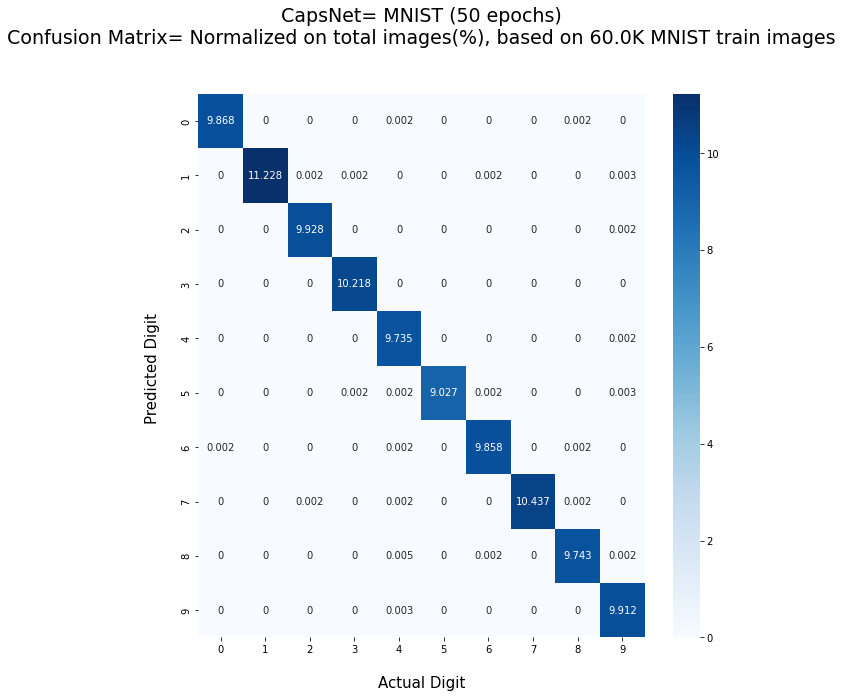

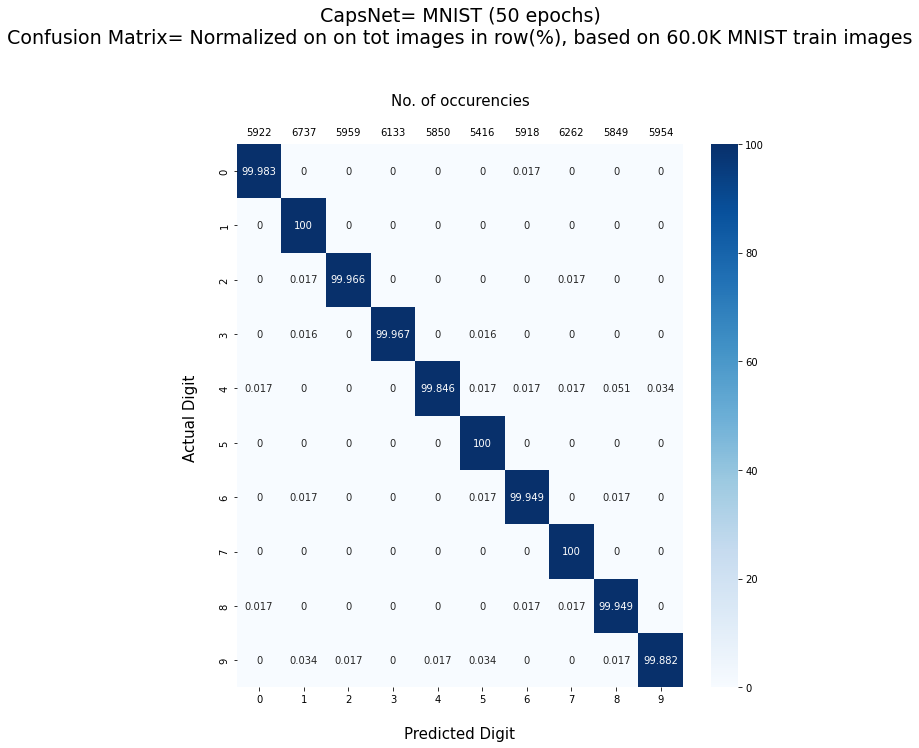

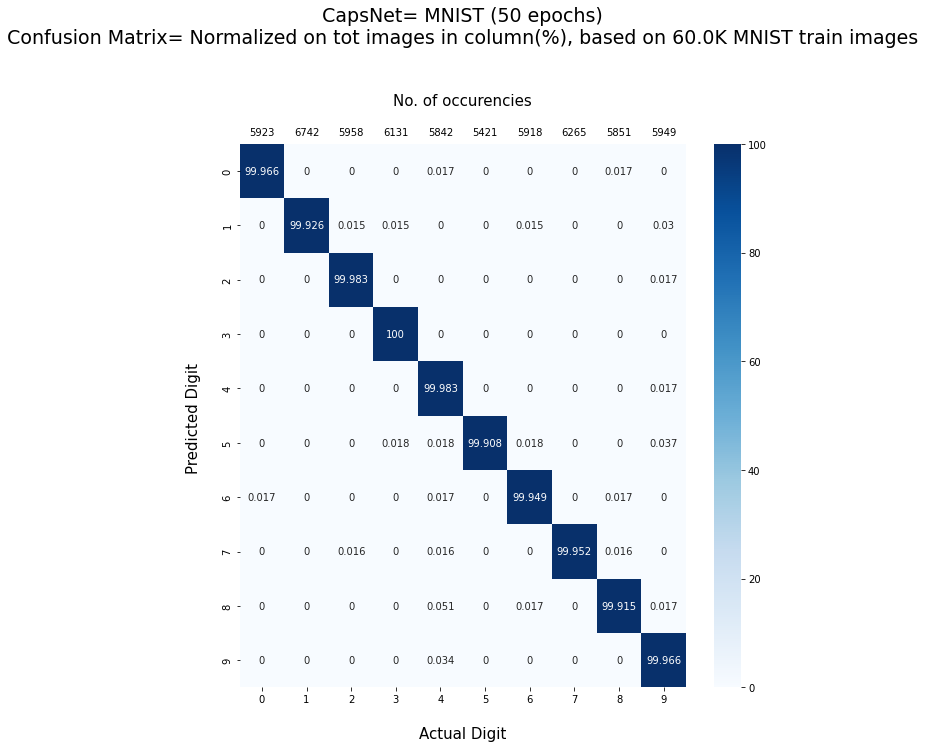

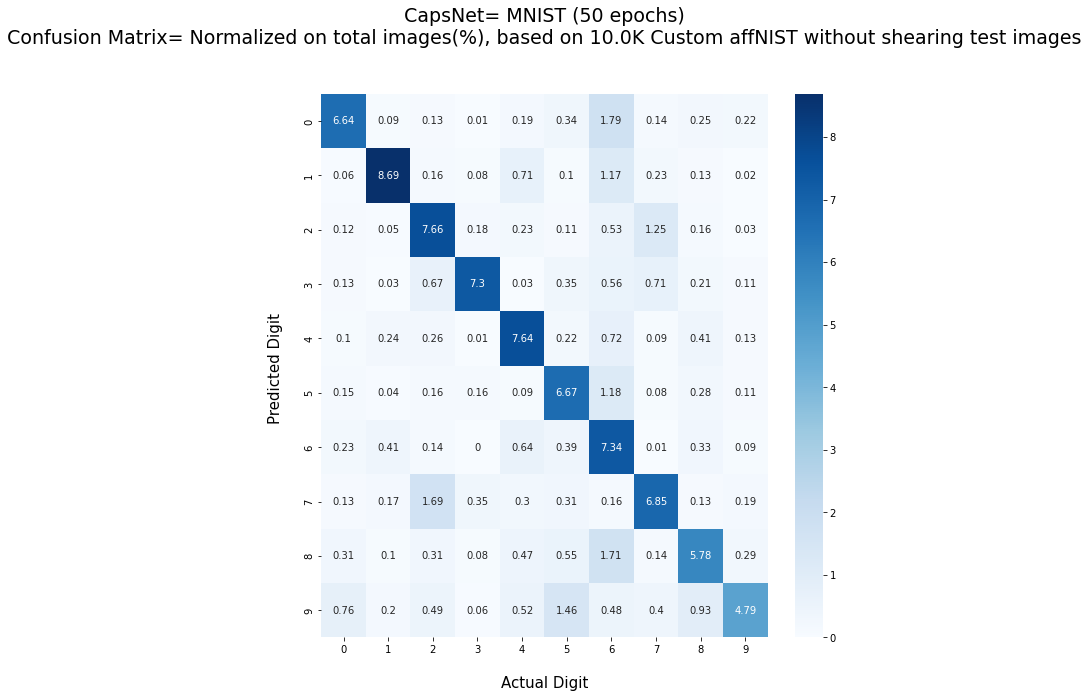

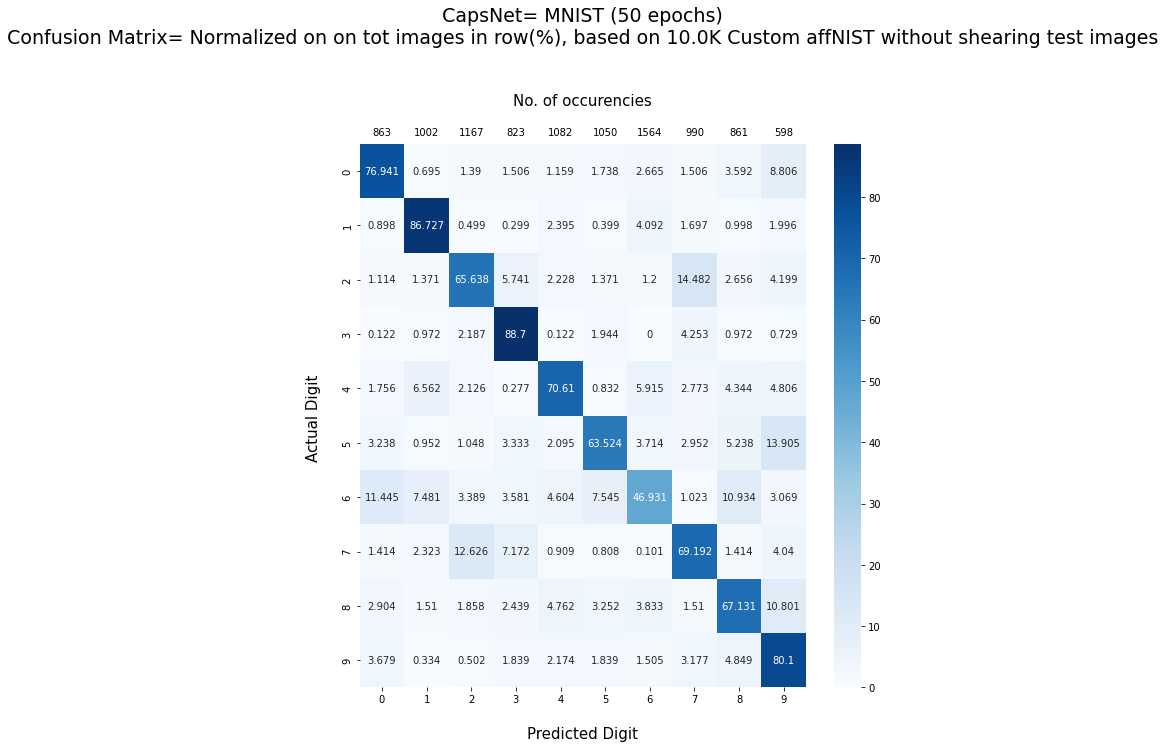

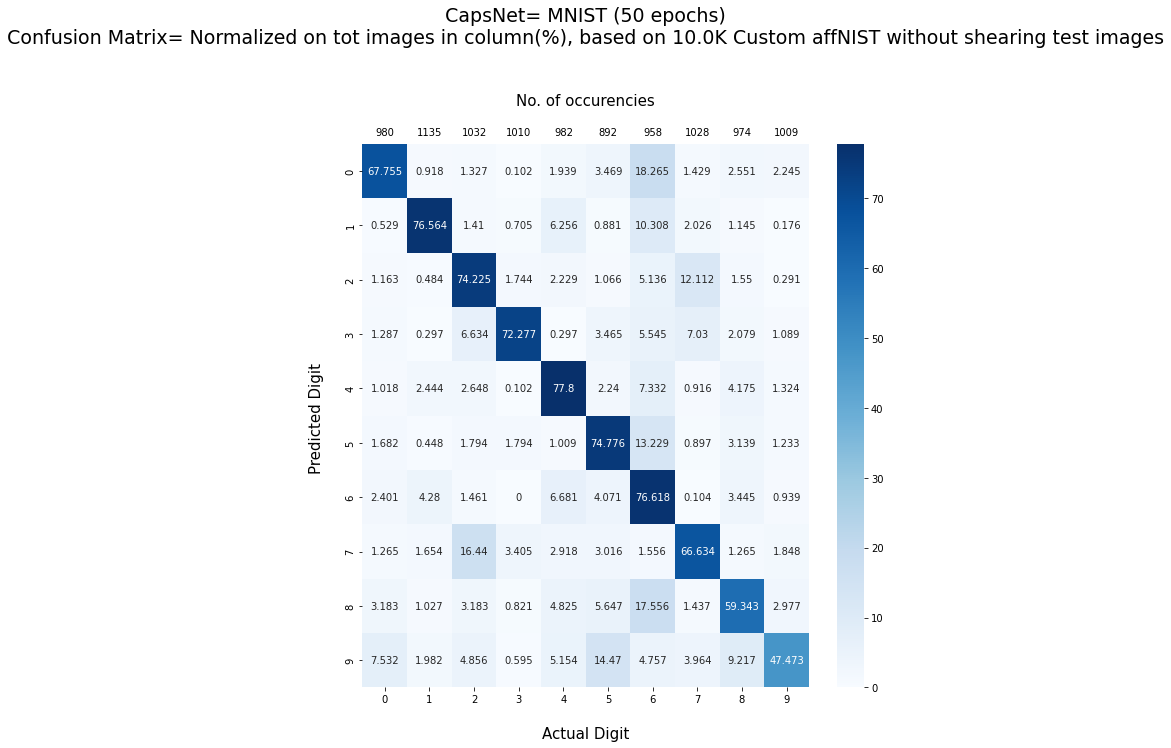

In [ ]:
######## TRAIN

mat = cm_train
n = no_train_images
s = '{0} ({1} epochs)'.format(p_train, epochs)

printer.print_matrix( perfu.normalize_matrix(mat, n),
                        'Normalized on total images(%)', 
                        s, 
                        '{0} train'.format(p_train), 
                         n)

printer.print_matrix( perfu.normalize_matrix_on_row(mat),
                        'Normalized on on tot images in row(%)', 
                        s, 
                        '{0} train'.format(p_train),  
                         n,
                         row_labels=printer.get_sum_row_matrix_label(mat))

printer.print_matrix( perfu.normalize_matrix_on_columns(mat),
                        'Normalized on tot images in column(%)', 
                        s, 
                        '{0} train'.format(p_train),  
                         n,
                         col_labels=printer.get_sum_colum_matrix_label(mat))

####### TEST

mat = cm_test
n = no_test_images

printer.print_matrix( perfu.normalize_matrix(mat, n),
                        'Normalized on total images(%)', 
                        s, 
                        '{0} test'.format(p_test),  
                         no_test_images)

printer.print_matrix( perfu.normalize_matrix_on_row(mat),
                        'Normalized on on tot images in row(%)', 
                        s, 
                        '{0} test'.format(p_test),  
                         n,
                         row_labels=printer.get_sum_row_matrix_label(mat))

printer.print_matrix( perfu.normalize_matrix_on_columns(mat),
                        'Normalized on tot images in column(%)', 
                        s, 
                        '{0} test'.format(p_test),  
                         n,
                         col_labels=printer.get_sum_colum_matrix_label(mat))

#### Accuracy

In [ ]:
printer.print_accuracy(acc_train, acc_test, no_train_images, no_test_images, epochs)

,Accuracy,# Images,Epochs
Train,99.954,60000,50
Test,69.360,10000,50


### Error cases

In [ ]:
off = 44
n = 110
idx, pred = perfu.get_error_index(model, X_test[off:off+n], y_test[off:off+n], off)

print(idx)
print(pred)

2022-11-04 18:48:38.353938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[44, 46, 47, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 97, 98, 99, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 122, 123, 124, 126, 127, 128, 129, 130, 131, 133, 134, 135, 138, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153]
[7, 7, 2, 6, 7, 6, 8, 7, 6, 5, 2, 1, 3, 6, 1, 4, 6, 0, 4, 2, 2, 7, 0, 0, 1, 7, 6, 2, 0, 6, 6, 6, 4, 6, 4, 1, 2, 7, 4, 0, 1, 6, 6, 1, 1, 2, 0, 0, 5, 6, 1, 6, 1, 1, 7, 6, 2, 4, 1, 9, 2, 1, 7, 2, 6, 6, 4, 6, 4, 1, 6, 1, 4, 1, 1, 7, 1, 9, 4, 7, 9, 1, 1, 1, 1, 1, 6]


/Users/paolobonomi/Work/Python/CapsNetwork/src/printer.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


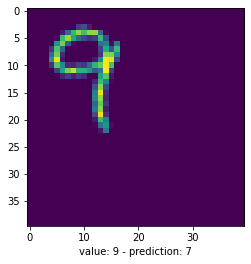

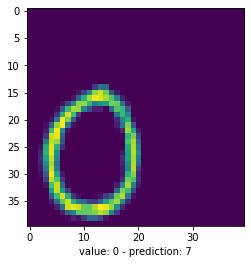

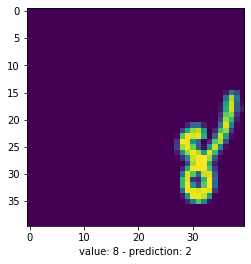

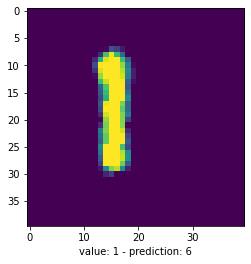

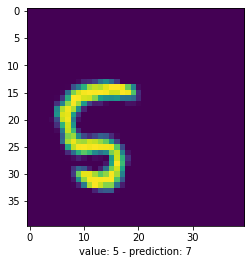

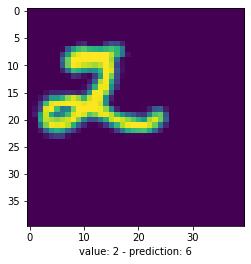

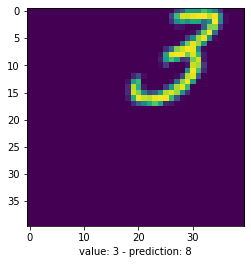

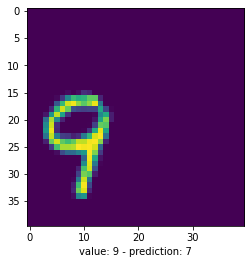

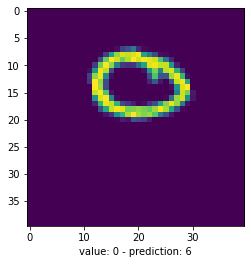

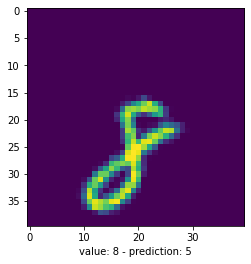

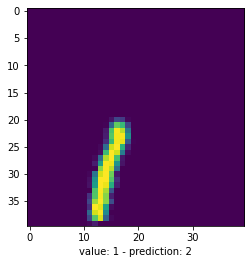

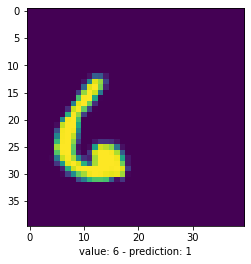

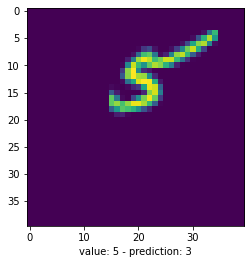

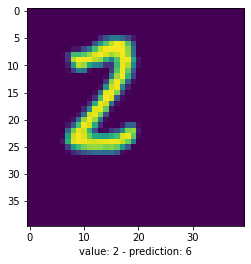

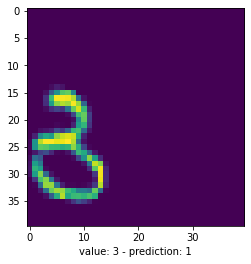

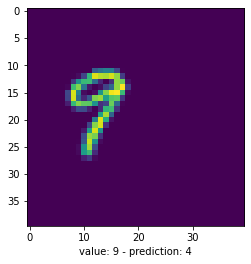

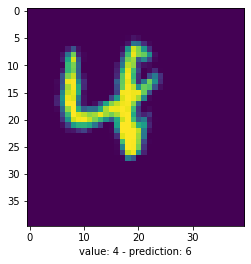

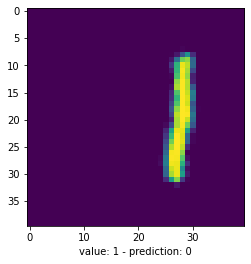

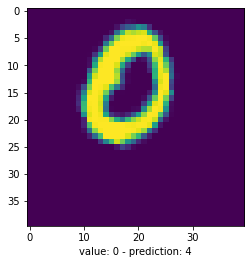

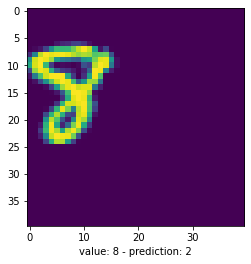

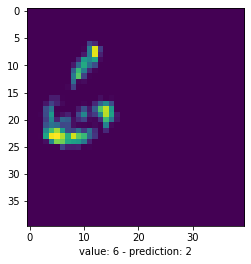

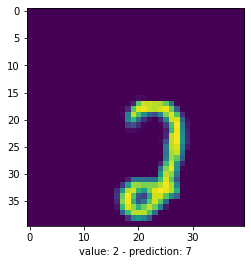

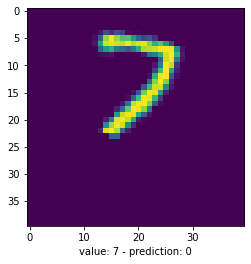

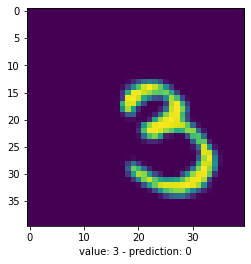

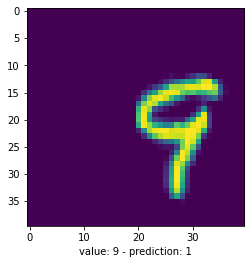

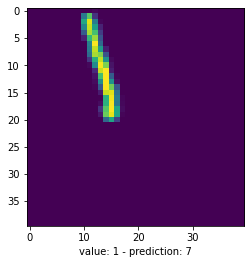

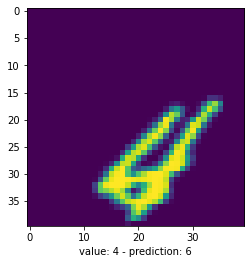

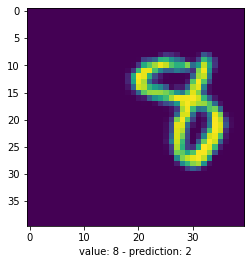

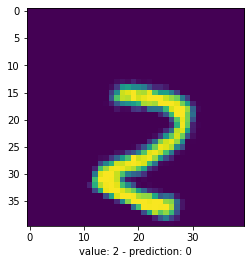

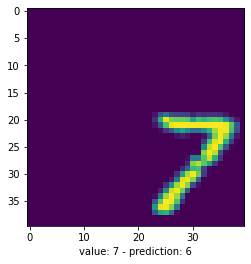

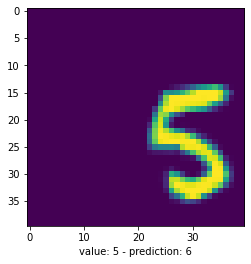

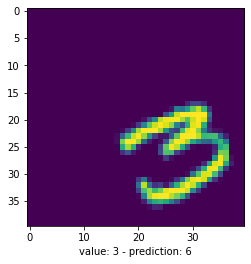

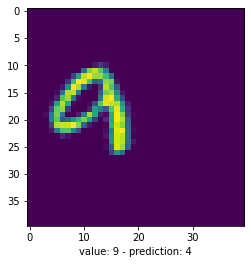

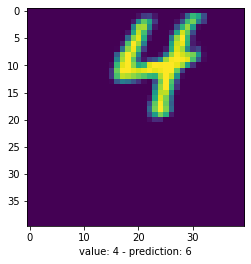

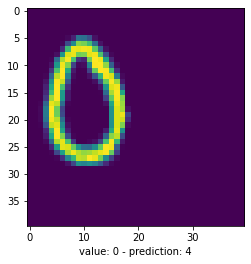

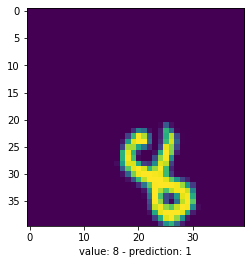

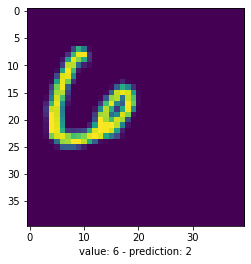

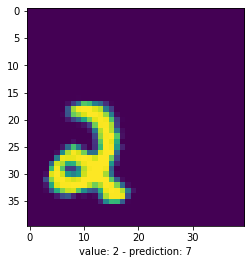

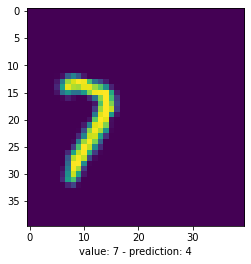

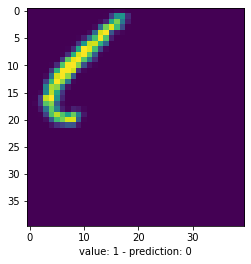

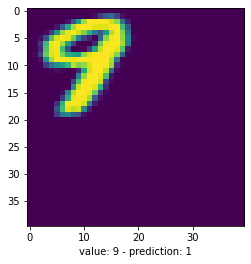

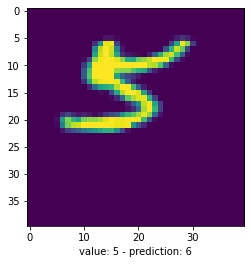

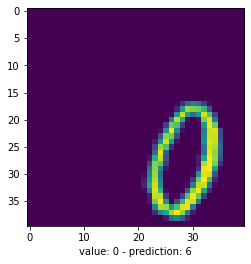

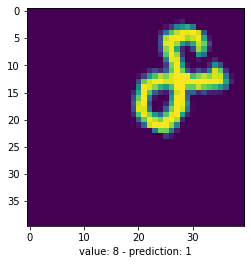

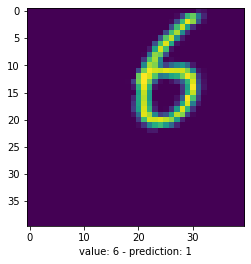

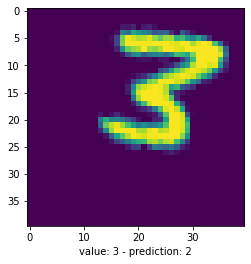

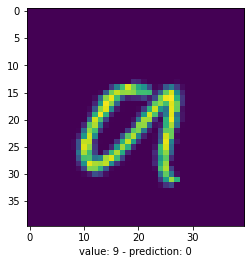

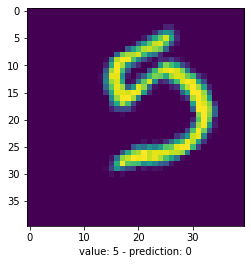

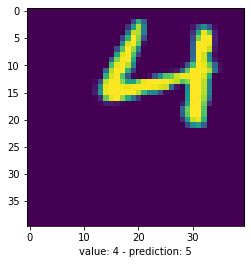

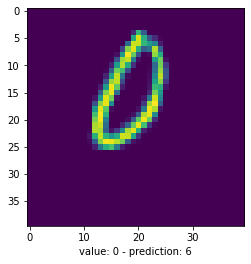

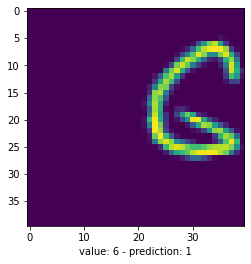

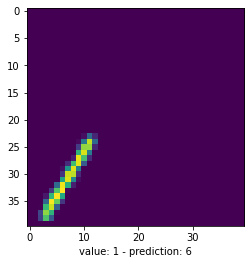

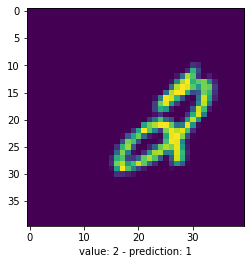

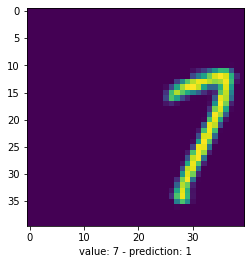

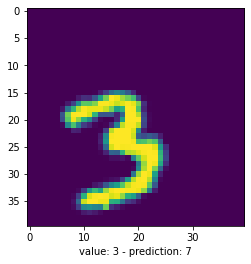

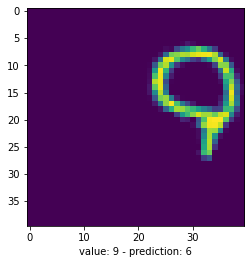

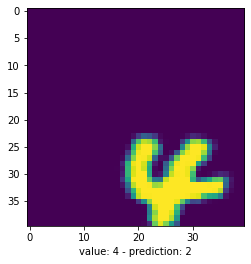

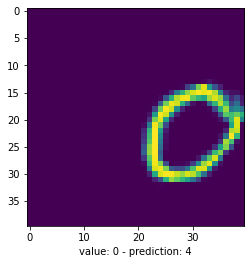

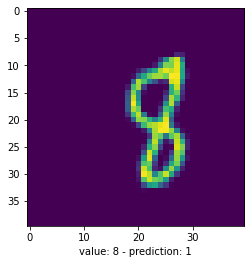

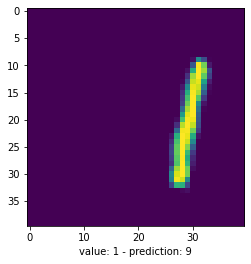

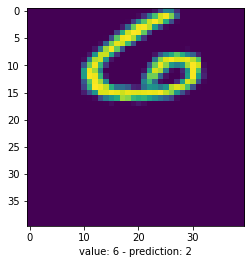

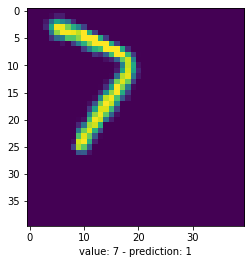

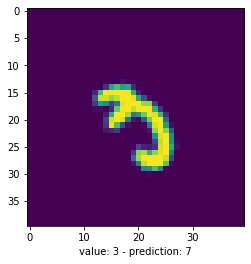

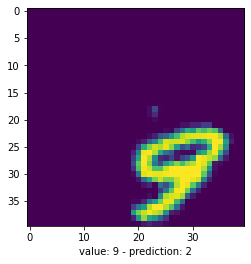

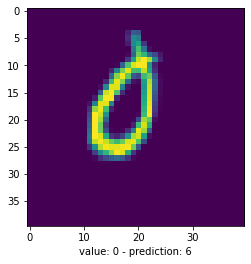

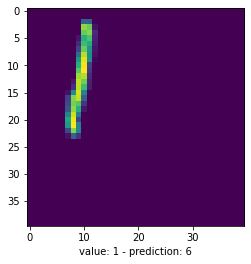

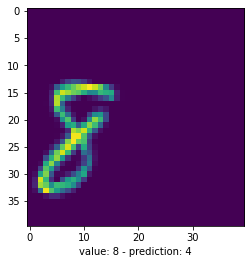

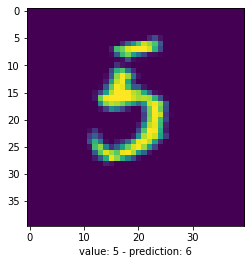

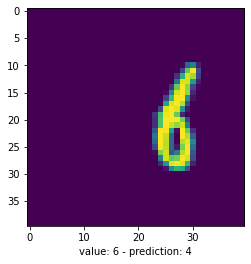

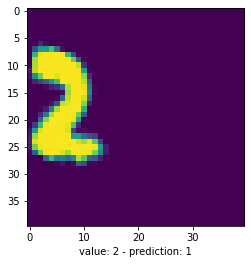

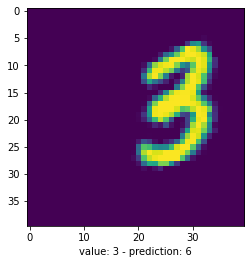

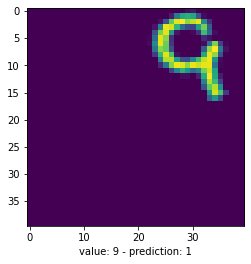

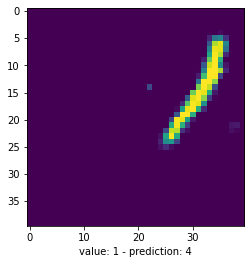

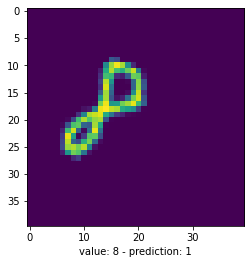

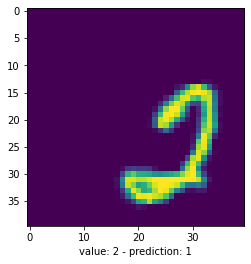

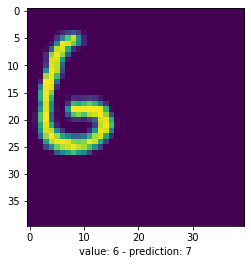

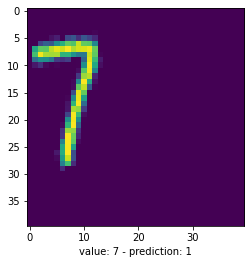

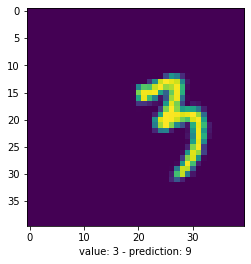

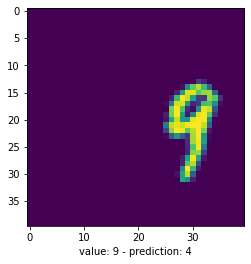

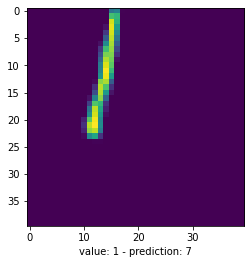

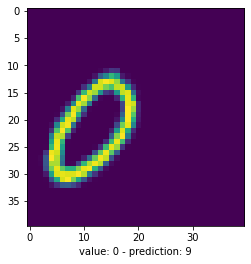

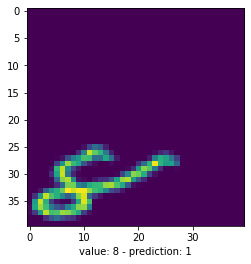

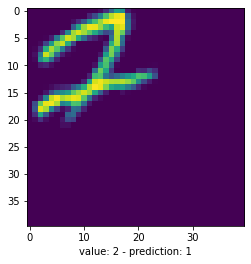

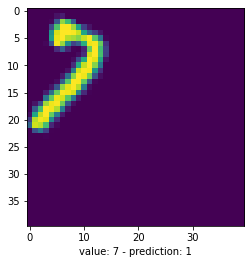

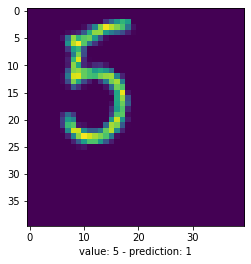

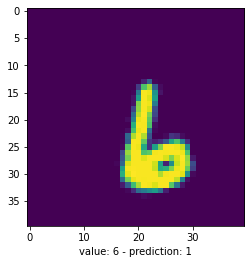

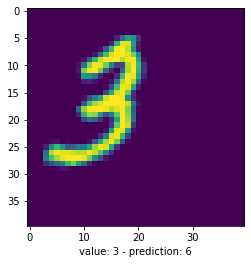

In [ ]:
for i in range(len(idx)):
    img = idx[i]
    printer.print_image_and_prediction(X_test[img], y_test[img], pred[i], 40 )


### Network Conv1/PrimaryCapsule Output

In [ ]:
printer.print_network(model, X_test[45], y_test[45], 40)

### Network Kernels

In [ ]:
printer.print_fixed_network_params(model)